<a href="https://colab.research.google.com/github/rydak81/BMS-Algorithms/blob/main/Copy_of_EKF_Est_Sim_334.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EKF Simulation: State Estimation & Error Analysis**

<ipython-input-11-e1e4741f83a3>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xstore[0] = xtrue


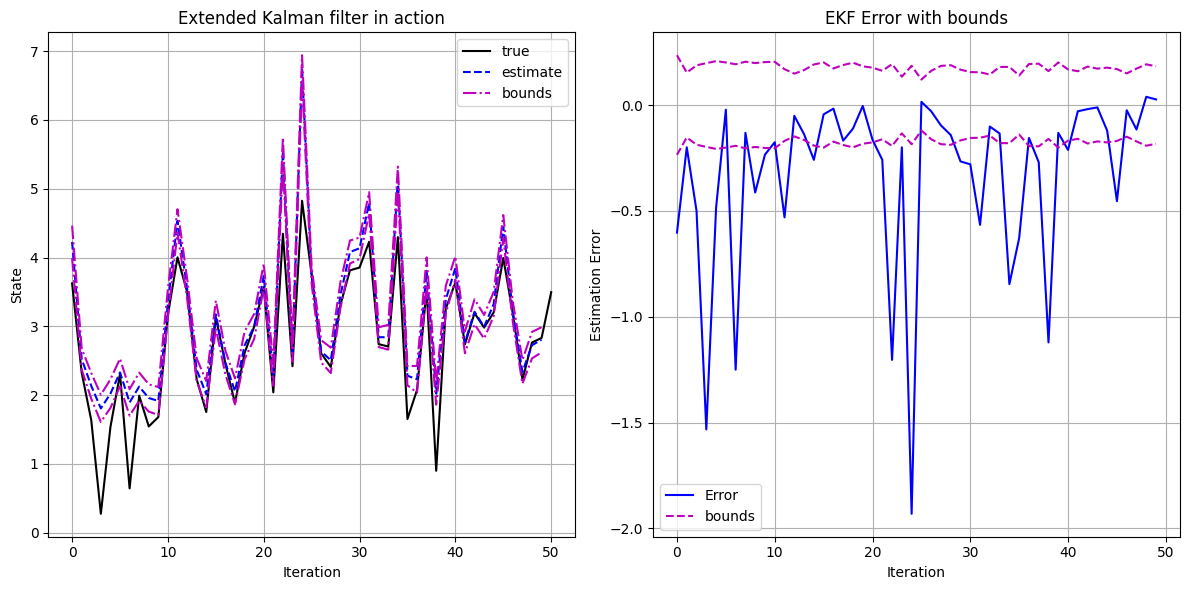

Maximum absolute estimation error: 1.9


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize simulation variables
SigmaW = 1  # Process noise covariance
SigmaV = 2  # Sensor noise covariance
maxIter = 50

# Seed the random number generator for reproducibility
np.random.seed(1)

# Initialize true state, state estimate, error covariance, initial input
xtrue = 2 + np.random.randn(1)  # Initialize true system initial state
xhat = 1                        # Initialize Kalman filter initial estimate
SigmaX = 2                      # Initialize Kalman filter covariance
u = 0                           # Unknown initial driving input: assume zero

# Reserve storage for variables we might want to plot/evaluate
xstore = np.zeros(maxIter+1)
xstore[0] = xtrue
xhatstore = np.zeros(maxIter)
SigmaXstore = np.zeros(maxIter)

for k in range(maxIter):
    # EKF Step 0: Compute Ahat, Bhat
    Ahat = 0.71 / np.sqrt(5 + xhat)
    Bhat = 1

    # EKF Step 1: State estimate time update
    xhat = np.sqrt(5 + xhat)

    # KF Step 2: Error covariance time update
    SigmaX = Ahat * SigmaX * Ahat + Bhat * SigmaW * Bhat

    # Implied operation of system in background
    w = np.linalg.cholesky([[SigmaW]]).T @ np.random.randn(1)
    v = np.linalg.cholesky([[SigmaV]]).T @ np.random.randn(1)
    ztrue = xtrue.item()**3 + v.item()  # Convert to scalar
    xtrue = np.sqrt(5 + xtrue.item()) + w.item()  # Convert to scalar

    # KF Step 3: Estimate system output
    Chat = 3 * xhat**2
    Dhat = 1
    zhat = xhat**3

    # KF Step 4: Compute Kalman gain matrix
    L = SigmaX * Chat / (Chat * SigmaX * Chat + Dhat * SigmaV * Dhat)

    # KF Step 5: State estimate measurement update
    xhat = xhat + L * (ztrue - zhat)
    xhat = max(-5, xhat)  # Ensure xhat is not negative

    # KF Step 6: Error covariance measurement update
    SigmaX = SigmaX - L * Chat * SigmaX

    # Store information for evaluation/plotting purposes
    xstore[k+1] = xtrue
    xhatstore[k] = xhat
    SigmaXstore[k] = SigmaX

# Plotting
plt.figure(figsize=(12, 6))

# Plot state estimates
plt.subplot(1, 2, 1)
plt.plot(range(maxIter+1), xstore[:maxIter+1], 'k-', label='true')
plt.plot(range(maxIter), xhatstore, 'b--', label='estimate')
plt.plot(range(maxIter), xhatstore + 3*np.sqrt(SigmaXstore), 'm-.', label='bounds')
plt.plot(range(maxIter), xhatstore - 3*np.sqrt(SigmaXstore), 'm-.')
plt.grid()
plt.legend()
plt.title('Extended Kalman filter in action')
plt.xlabel('Iteration')
plt.ylabel('State')

# Plot estimation error
plt.subplot(1, 2, 2)
estErr = xstore[:maxIter] - xhatstore
bounds = 3*np.sqrt(SigmaXstore)
plt.plot(range(maxIter), estErr, 'b-', label='Error')
plt.plot(range(maxIter), bounds, 'm--', label='bounds')
plt.plot(range(maxIter), -bounds, 'm--')
plt.grid()
plt.legend()
plt.title('EKF Error with bounds')
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')

plt.tight_layout()
plt.show()

# Calculate the maximum absolute estimation error
max_abs_est_err = np.max(np.abs(estErr))
print(f'Maximum absolute estimation error: {max_abs_est_err:.1f}')
